# Chem 30324, Spring 2024, Homework 9


# Due April 15, 2024


## The two-state system.
### Consider a closed system containing $N$ objects, each of which can be in one of two energy states, of energy either 0 or $\varepsilon$. The total internal energy $U$ of the box is the sum of the energies of the individual objects.

![Boltzmann](imgs/Boltzmann.png)

### 1. Write down all the possible microstates for a box in which $N = 4$ and the internal energy $U = 2\varepsilon$.

$\Omega = \left(^4_2\right) = 6$

### 2. What does the postulate of *equal a priori probabilities* say about the relative likelihood of occurance of any one of these microstates?

Given an isolated system in equilibrium, it is found with equal probability in

each of it's accessible microstates

### 3. What is the entropy of the box? (Thank you, Ludwig Boltzmann.)

$\Omega = \left(^4_2\right) = 6$

$S = k_Bln\Omega = 2.474\times10^{-23} J/k$

### 4. Suppose two identical such boxes are brought into thermal contact and allowed to come to equilibrium. Calculate the change in internal energy $\Delta U$ and in entropy $\Delta S$ associated with this process.

$U_{initial} = 2\varepsilon + 2\varepsilon = 4\varepsilon = U_{final}$, so, $\Delta U = 0$.

$\Omega_{initial} = 6$, $S_{initial} = k_Bln6 + k_Bln6$.

$\Omega_{final} = \left(^8_4\right) = 70$, $S_{final} = k_Bln\Omega_{final} = k_Bln70$.

*So*, $\Delta S = k_Bln70 - 2k_Bln6 = 9.18\times10^{-24}J/k$.

## The canonical ensemble.
### The energy spectrum of some molecule is described by the diagram below.  A large number $N$ of these distinguishable molecules is in thermal equilibrium with a much larger reservoir of temperature $T$.

![Untitled drawing (1).jpg](attachment:e9d6185e-3f1d-4fc8-83fe-28bcb3d4bd3e.jpg)

### 5. Write the partition function $q$ for one of the molecules in the system (a) in terms of $T$ and $\varepsilon$, (b) in terms of $\beta = 1/k_B T$ and $\varepsilon$, and (c) in terms of a characteristic temperature $\theta = \varepsilon/k_B$.

a) $q = 1 + 2e^{-\frac{\varepsilon}{k_B T}} + 3e^{-2\frac{\varepsilon}{k_B T}} $

b) $q = 1 + 2e^{-\beta\varepsilon} + 3e^{-2\beta\varepsilon}$

c) $q = 1 + 2e^{-\frac{\vartheta}{ T}} + 3e^{-2\frac{\vartheta}{T}} $




### 6. Plot the relative fractions of molecules of energy 0, $\varepsilon$, and $2\varepsilon$  vs. temperature.  Assume $\theta = 300$ K. Be sure to indicate the probabilities in the limits of $T\rightarrow 0$ and $T \rightarrow \infty$.

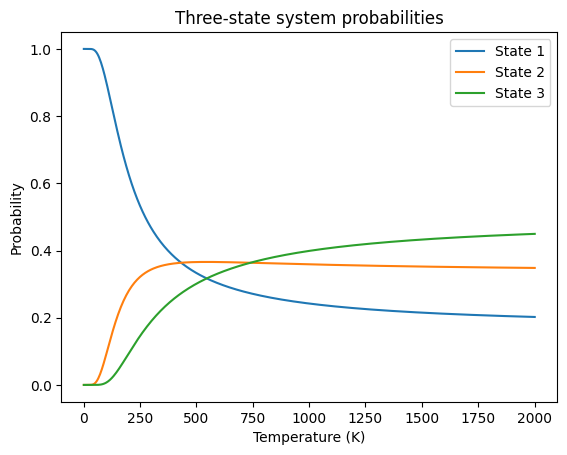

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

k = 8.61734e-5   # eV /K
theta = 300.  # epsilon/kB


def q(T):
   return 1. + 2.*np.exp(-theta/T) + 3.*np.exp(-2.*theta/T)

def P1(T):
   return 1/q(T)

def P2(T):
   return 2.*np.exp(-theta/T)/q(T)

def P3(T):
   return 3.*np.exp(-2.*theta/T)/q(T)

T = np.linspace(1,2001,500)

plt.plot(T,P1(T),label='State 1')
plt.plot(T,P2(T),label='State 2')
plt.plot(T,P3(T),label='State 3')
plt.xlabel('Temperature (K)')
plt.ylabel('Probability')
plt.legend()
plt.title('Three-state system probabilities')
plt.show()

|Probabilities|$T\rightarrow 0$|$T \rightarrow \infty$|
|-|-|-|
|$P(0)=\frac{1}{q}$|1|$\frac{1}{6}$|
|$P(\varepsilon)=\frac{2e^{-\beta\varepsilon}}{q}$|0|$\frac{2}{6}$|
|$P(2\varepsilon)=\frac{3e^{-2\beta\varepsilon}}{q}$|0|$\frac{3}{6}$|

### 7. Derive an expression for the internal energy $U$ per molecule by summing over the possible microstates weighted by their probabilities. Plot the average energy vs. temperature, assuming  $\theta =300$ K.

:$U = 0P(0) + \varepsilon P(\varepsilon) + 2\varepsilon P(2\varepsilon) = \varepsilon\frac{2e^{-\beta\varepsilon}}{q} + 2\varepsilon\frac{3e^{-2\beta\varepsilon}}{q} = \frac{2\varepsilon e^{-\beta\varepsilon} + 6\varepsilon e^{-2\beta\varepsilon}}{q}$

Text(0.5, 1.0, 'Three-state system internal energy')

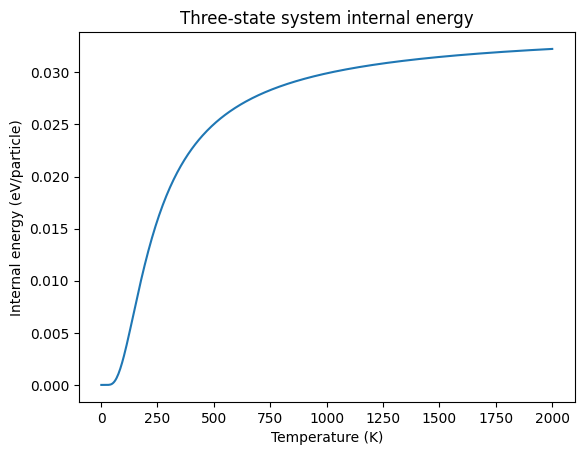

In [ ]:
def U(T):
   epsilon = theta*k
   return (2.*epsilon * np.exp(-theta/T) + 6.*epsilon * np.exp(-2.*theta/T))/ q(T)
plt.show()
plt.plot(T,U(T))
plt.xlabel('Temperature (K)')
plt.ylabel('Internal energy (eV/particle)')
plt.title('Three-state system internal energy')

### 8. Derive an expression for the internal energy $U$ per molecule by taking the appropriate derivative of the partition function from problem 5 (*Hint:* it is easier to work with the expressions in term of $\beta$ than in $T$.) Does your result agree with that from Question 7?

$\left<U\right> = -\left(\frac{dlnq}{d\beta}\right) = -\frac{1}{q}\left(\frac{dq}{d\beta}\right) = -\frac{1}{q}\frac{d(1 + 2e^{-\beta\varepsilon} + 3e^{-2\beta\varepsilon})}{d\beta} = \frac{2\varepsilon e^{-\beta\varepsilon} + 6\varepsilon e^{-2\beta\varepsilon}}{q}$

### 9. Derive an expression for the Helmholtz energy $A$ per molecule from the partition function. Plot $A$ vs. temperature, assuming $\theta
= 300$ K.

$A = U - TS = U - T(\frac{U}{T}+k_Blnq) = -k_BTlnq = -k_BTln(1 + 2e^
{-\beta\varepsilon} + 3e^{-2\beta\varepsilon}) = -k_BTln(1 + 2e^{-300/T} + 3e^{-600/T})$

Text(0.5, 1.0, 'Three-state system Helmholtz free energy')

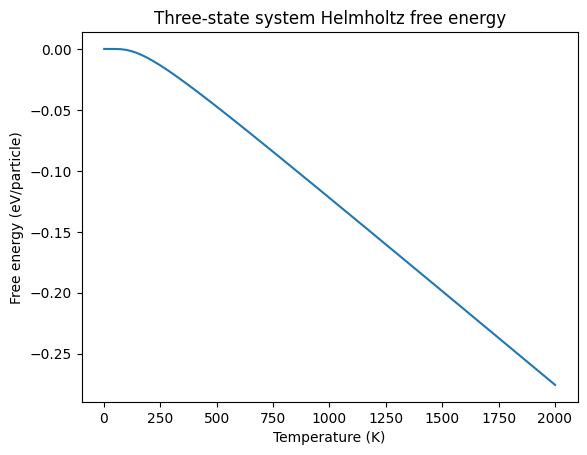

In [ ]:
def A(T):
  q = 1. + 2.*np.exp(-theta/T) + 3.*np.exp(-2.*theta/T)
  return -k*T*np.log(q)
plt.show()
plt.plot(T,A(T))
plt.xlabel('Temperature (K)')
plt.ylabel('Free energy (eV/particle)')
plt.title('Three-state system Helmholtz free energy')

### 10. Derive an expression for the entropy $S$ per molecules and plot vs. temperature, again assuming $\theta = 300$ K.

Text(0.5, 1.0, 'Three-state system entropy')

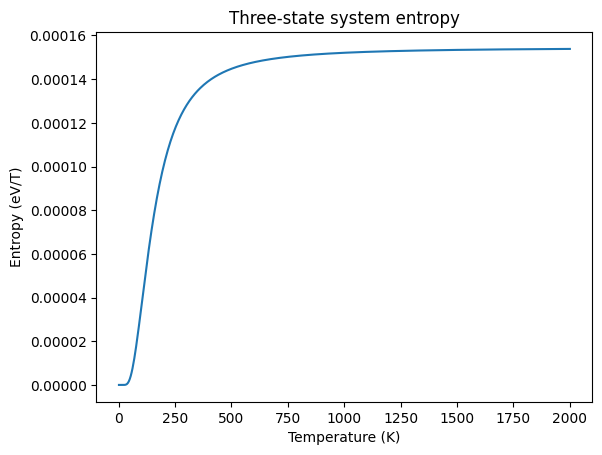

In [ ]:
def S(T):
   return (U(T) - A(T))/T
plt.show()
plt.plot(T,S(T))
plt.xlabel('Temperature (K)')
plt.ylabel('Entropy (eV/T)')
plt.title('Three-state system entropy')

### 11. In class we took the First Law as a postulate and demonstrated the Second Law. Look at your results for Problems 6 and 10. Can you use them to rationalize the Third Law? Explain your answer.

Yes. The entropy at absolute zero is equal to zero. From problem 9, we can get
when T = 0 K, the molecule has the probability of 1 to be in the 0 energy state. $S(T = 0 K) = k_Bln(1) = 0$. From number 13, we can also get $S \rightarrow 0$ when $T\rightarrow 0$.

## *Extra Credit:* Canonical vibrations
### Long ago, we talked about the Einstein model for the heat capacity of a crystal. Einstein posited that the atoms in the crystal vibrated with discrete energies given by $\epsilon = n h \nu$, where $n = 0, 1, \ldots$ is the quantum number, $h$ is Planck's constant, and $\nu$ is the frequency of vibration.

### 12. Write down the vibrational partition function for one of the atoms in terms of $h$, $\nu$, and $T$.


### 13. Derive a closed form for the partition function. (*Hint:* Think geometric series.)

### 14. Look at Einstein's expression for the heat capacity of a crystal, Table 7 of the extended outline. Do you see any similarities?